In [1]:
import sys
sys.path.append('..')
from nature import *
figsize=(width_in_inches*2, height_in_inches)
markersize = 0.1
print('figsize:', figsize, 'fontsize:', fontsize)
plt.rcParams.update({'lines.linewidth': 1.5, 'lines.markersize': 0.1})

figsize: (6.692913385826772, 3.346456692913386) fontsize: 7


In [2]:
fn_acc = './scaling_phase_acc.csv'
fn_loss = './scaling_phase_loss.csv'

c0, c1, c2, c3, c4 = ['red', 'royalblue', 'forestgreen', 'chocolate', 'black' ]
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
phase_acc = pd.read_csv(fn_acc)
phase_loss = pd.read_csv(fn_loss)

phase_acc.columns, phase_loss.columns


(Index(['trainer/global_step', 'phase_reshape_10k_resumed - _step',
        'phase_reshape_10k_resumed - _step__MIN',
        'phase_reshape_10k_resumed - _step__MAX',
        'phase_reshape_10k_resumed - val/acc_epoch',
        'phase_reshape_10k_resumed - val/acc_epoch__MIN',
        'phase_reshape_10k_resumed - val/acc_epoch__MAX',
        'phase_reshape_1M - _step', 'phase_reshape_1M - _step__MIN',
        'phase_reshape_1M - _step__MAX', 'phase_reshape_1M - val/acc_epoch',
        'phase_reshape_1M - val/acc_epoch__MIN',
        'phase_reshape_1M - val/acc_epoch__MAX', 'phase_reshape_10k - _step',
        'phase_reshape_10k - _step__MIN', 'phase_reshape_10k - _step__MAX',
        'phase_reshape_10k - val/acc_epoch',
        'phase_reshape_10k - val/acc_epoch__MIN',
        'phase_reshape_10k - val/acc_epoch__MAX', 'phase_train500kids - _step',
        'phase_train500kids - _step__MIN', 'phase_train500kids - _step__MAX',
        'phase_train500kids - val/acc_epoch',
        'phase_

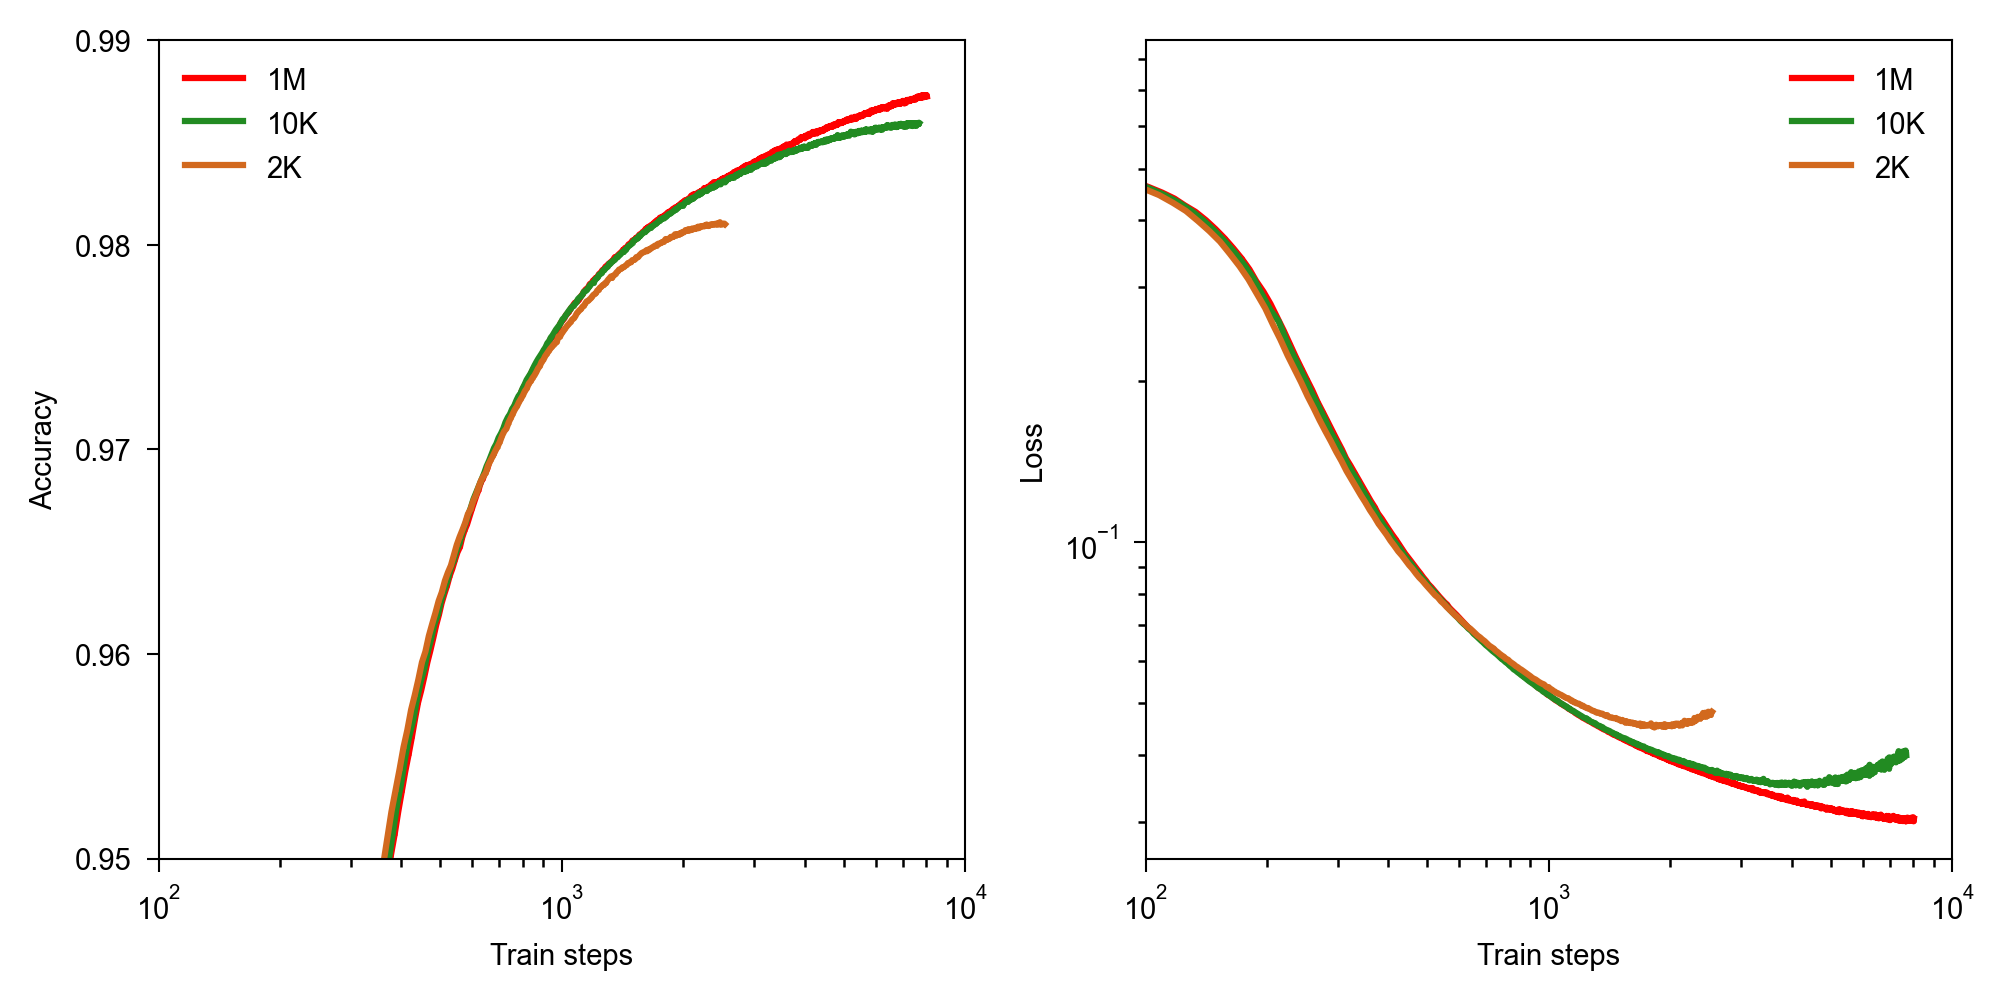

In [3]:

# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=figsize)

# Accuracy subplot
ax = axs[0]

x = phase_acc['trainer/global_step']
y = phase_acc['phase_reshape_1M - val/acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='1M', color=c0, marker='o')

x1_acc = phase_acc['trainer/global_step']
y1_acc = phase_acc['phase_reshape_10k - val/acc_epoch']
y2_acc = phase_acc['phase_reshape_10k_resumed - val/acc_epoch']
x_acc = np.concatenate([x1_acc, x1_acc])
y_acc = np.concatenate([y1_acc, y2_acc])
non_nan_indices = ~pd.isna(y_acc)
ax.plot(x_acc[non_nan_indices], y_acc[non_nan_indices], label='10K', color=c2, marker='o')

x = phase_acc['trainer/global_step']
y = phase_acc['phase_train2402 - val/acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='2K', color=c3, marker='o')

# ax.plot(phase_acc['trainer/global_step'], phase_acc['phase_train500kids - val/acc_epoch'], label='500K', color=c3, marker='o', markersize=0.3)
ax.set_xscale('log')
ax.set_ylim(0.95, 0.99)
ax.set_xlim(100, 1e4)
ax.set_xlabel('Train steps')
ax.set_ylabel('Accuracy')
ax.set_yticks([0.95, 0.96, 0.97, 0.98, 0.99])
ax.tick_params(axis='y')
ax.legend(handlelength=2, handleheight=1, loc='best', markerscale=2)
# ax.set_title('Phase test')

# Loss subplot
ax = axs[1]
x = phase_loss['trainer/global_step']
y = phase_loss['phase_reshape_1M - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='1M', color=c0, marker='o')

x1_loss = phase_loss['trainer/global_step']
y1_loss = phase_loss['phase_reshape_10k - val/loss_epoch']
y2_loss = phase_loss['phase_reshape_10k_resumed - val/loss_epoch']
x_loss = np.concatenate([x1_loss, x1_loss])
y_loss = np.concatenate([y1_loss, y2_loss])
non_nan_indices = ~pd.isna(y_loss)
ax.plot(x_loss[non_nan_indices], y_loss[non_nan_indices], label='10K', color=c2, marker='o')

x = phase_loss['trainer/global_step']
y = phase_loss['phase_train2402 - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='2K', color=c3, marker='o')
# ax.plot(phase_acc['trainer/global_step'], phase_acc['phase_train500kids - val/acc_epoch'], label='500K', color=c3, marker='o', markersize=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(100, 1e4)
ax.set_xlabel('Train steps')
ax.set_ylabel('Loss')
# Optionally set y-ticks for log scale if desired
ax.legend(handlelength=2, handleheight=1, loc='best', markerscale=2)
# ax.set_title('Phase test')

plt.tight_layout()
plt.savefig('scaling_phase_acc_loss.pdf', bbox_inches='tight')
plt.show()